In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
library(phyloseq)
library(dplyr)
library(ggplot2)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [30]:
%%R
physeq = import_biom("../../SeqData/ITS.otu_table.tax.meta.biom", parseFunction = parse_taxonomy_greengenes)

Merge<-paste(as.character(sample_data(physeq)$Trtmt),as.character(sample_data(physeq)$Month),as.character(sample_data(physeq)$Cosm),sep="_")
sample_data(physeq)$Merge <- Merge

ps.merged = merge_samples(physeq, "Merge")
# Merging the phyloseq object by biological replicates

ps.merged = subset_samples(ps.merged,row.names(sample_data(ps.merged))!="S_2.5_14")
# Removing soil sample with large Onygenales taxon (Emmonsia) - soil saprotroph, but huge

keep=c("Cosm","Month","Trtmt")
sd = sample_data(ps.merged)
sd = sd[,keep]
sd$Trtmt = substring(row.names(sd),1,1)
sd$Trtmt[sd$Trtmt=="B"]="Blank"
sd$Trtmt[sd$Trtmt=="F"]="Ferrihydrite"
sd$Trtmt[sd$Trtmt=="Q"]="Quartz"
sd$Trtmt[sd$Trtmt=="H"]="Heavy Fraction"
sd$Trtmt[sd$Trtmt=="S"]="Soil"
sd$Trtmt[sd$Trtmt=="K"]="Kaolinite"
sample_data(ps.merged) = sd
sample_data(ps.merged)
# Cleaning up the sample data table
physeq = ps.merged
physeq = transform_sample_counts(physeq, function(x) x / sum(x))

In [32]:
%%R
ps.ITS.nemat = subset_taxa(physeq,Family=="Hypocreaceae")
ps.ITS.nemat

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 14 taxa and 72 samples ]
sample_data() Sample Data:       [ 72 samples by 3 sample variables ]
tax_table()   Taxonomy Table:    [ 14 taxa by 8 taxonomic ranks ]


In [33]:
%%R
ps.ITS.nemat.df = psmelt(ps.ITS.nemat)

In [24]:
%%R
physeq.16S = import_biom("../../../16S/SeqData/otu_table.tax.meta.biom", "../../../16S/SeqData/trees/fulltree.tre", parseFunction = parse_taxonomy_greengenes)
Merge<-paste(as.character(sample_data(physeq.16S)$Trtmt),as.character(sample_data(physeq.16S)$Month),as.character(sample_data(physeq.16S)$Cosm),sep="_")
sample_data(physeq.16S)$Merge <- Merge
# Creating a new column in the phyloseq sample data called Merge,
# which contains a concatenated ID so all samples from the same mineral, month, and cosm
# will have the same ID (thus merging PCR and buffer replicates).

ps.merged = merge_samples(physeq.16S, "Merge")
# Merging the phyloseq object by biological replicates

keep=c("Cosm","Month","Trtmt")
sd = sample_data(ps.merged)
sd = sd[,keep]
sd$Trtmt = substring(row.names(sd),1,1)
sd$Trtmt[sd$Trtmt=="B"]="Blank"
sd$Trtmt[sd$Trtmt=="F"]="Ferrihydrite"
sd$Trtmt[sd$Trtmt=="Q"]="Quartz"
sd$Trtmt[sd$Trtmt=="H"]="Heavy Fraction"
sd$Trtmt[sd$Trtmt=="S"]="Soil"
sd$Trtmt[sd$Trtmt=="K"]="Kaolinite"
sample_data(ps.merged) = sd
sample_data(ps.merged)
# Cleaning up the sample data table
physeq.16S = ps.merged
physeq.16S = transform_sample_counts(physeq.16S, function(x) x / sum(x))

In [67]:
%%R
ps.16S.nemat = subset_taxa(physeq.16S,Genus=="Candidatus Xiphinematobacter")
ps.16S.nemat

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 20 taxa and 66 samples ]
sample_data() Sample Data:       [ 66 samples by 3 sample variables ]
tax_table()   Taxonomy Table:    [ 20 taxa by 7 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 20 tips and 19 internal nodes ]


In [26]:
%%R
otu_table(ps.16S.nemat)

OTU Table:          [89 taxa and 66 samples]
                     taxa are columns
            39_145769      64_8673     65_43844     96_26631     65_23273
B__      0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
F_2_15   0.000000e+00 0.000000e+00 5.571651e-05 0.000000e+00 0.000000e+00
F_2_28   0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
F_2_33   0.000000e+00 0.000000e+00 0.000000e+00 1.155936e-04 5.779679e-05
F_2_9    0.000000e+00 0.000000e+00 7.244802e-05 7.244802e-05 7.244802e-05
F_2.5_13 0.000000e+00 0.000000e+00 4.033397e-05 0.000000e+00 4.033397e-05
F_2.5_14 0.000000e+00 0.000000e+00 4.180864e-05 0.000000e+00 7.316512e-05
F_2.5_16 0.000000e+00 3.321266e-05 1.494570e-04 0.000000e+00 1.162443e-04
F_2.5_27 0.000000e+00 5.769120e-05 1.923040e-04 0.000000e+00 6.922944e-04
F_2.5_3  0.000000e+00 0.000000e+00 1.805413e-04 0.000000e+00 1.083248e-04
F_2.5_30 0.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00 1.126951e-04
F_2.5_31 0.000000e+00 5.94053

In [68]:
%%R
ps.16S.nemat.df = psmelt(ps.16S.nemat)

In [69]:
%%R
nem.bact = ps.16S.nemat.df %>%
    group_by(Trtmt,Month,Sample)%>%
    summarize(Abundance=sum(Abundance))
nem.bact

Source: local data frame [66 x 4]
Groups: Trtmt, Month

          Trtmt Month   Sample    Abundance
1         Blank    NA      B__ 0.0235525025
2  Ferrihydrite   2.0   F_2_15 0.0004457321
3  Ferrihydrite   2.0   F_2_28 0.0013845186
4  Ferrihydrite   2.0   F_2_33 0.0006935614
5  Ferrihydrite   2.0    F_2_9 0.0011591683
6  Ferrihydrite   2.5 F_2.5_13 0.0012100190
7  Ferrihydrite   2.5 F_2.5_14 0.0017977716
8  Ferrihydrite   2.5 F_2.5_16 0.0015111761
9  Ferrihydrite   2.5 F_2.5_27 0.0189227130
10 Ferrihydrite   2.5  F_2.5_3 0.0020040080
..          ...   ...      ...          ...


In [56]:
%%R
nem.fung = ps.ITS.nemat.df %>%
    group_by(Trtmt,Month,Sample)%>%
    summarize(Abundance=sum(Abundance))
nem.fung

Source: local data frame [72 x 4]
Groups: Trtmt, Month

          Trtmt Month   Sample    Abundance
1         Blank    NA      B__ 0.0000000000
2  Ferrihydrite   2.0   F_2_15 0.0001081256
3  Ferrihydrite   2.0   F_2_28 0.0001232856
4  Ferrihydrite   2.0   F_2_33 0.0000000000
5  Ferrihydrite   2.0    F_2_9 0.0003437903
6  Ferrihydrite   2.5 F_2.5_13 0.0000000000
7  Ferrihydrite   2.5 F_2.5_14 0.0000000000
8  Ferrihydrite   2.5 F_2.5_16 0.0040281974
9  Ferrihydrite   2.5 F_2.5_27 0.0018501812
10 Ferrihydrite   2.5  F_2.5_3 0.0013310515
..          ...   ...      ...          ...


In [70]:
%%R
nem = merge(nem.fung,nem.bact,by = c("Sample","Month","Trtmt"))
colnames(nem) = c("Sample","Month","Trtmt","Fungi","Bacteria")
head(nem)

    Sample Month        Trtmt        Fungi     Bacteria
1      B__    NA        Blank 0.0000000000 0.0235525025
2   F_2_15   2.0 Ferrihydrite 0.0001081256 0.0004457321
3   F_2_28   2.0 Ferrihydrite 0.0001232856 0.0013845186
4   F_2_33   2.0 Ferrihydrite 0.0000000000 0.0006935614
5    F_2_9   2.0 Ferrihydrite 0.0003437903 0.0011591683
6 F_2.5_13   2.5 Ferrihydrite 0.0000000000 0.0012100190


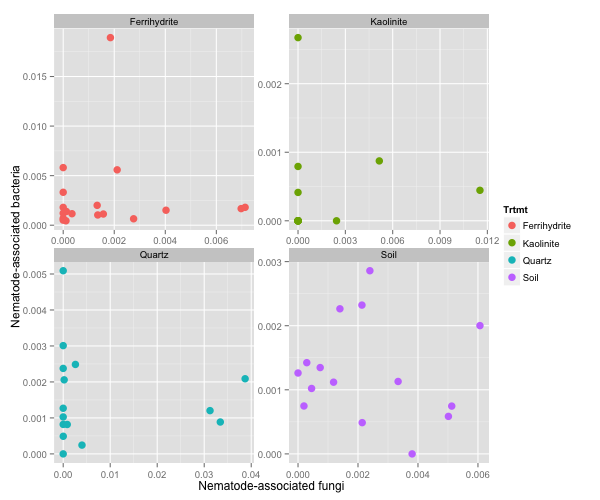

In [87]:
%%R -h 500 -w 600
d = nem
d = d %>%
    filter(Trtmt!="Blank")%>%
#    filter(Trtmt!="Soil")%>%
    filter(Trtmt!="Heavy Fraction")

p = ggplot(d, aes(x=Fungi, y=Bacteria, colour=Trtmt))
p = p + geom_point(shape=16, size= 3.5)
p = p + ylab("Nematode-associated bacteria") + xlab("Nematode-associated fungi")
p = p + facet_wrap(~Trtmt, ncol=2, scales="free")
p

No clear patterns but could try presence/absence  
Maybe see if there are any Pseudomonas aeruginosa